## Sine wave Classifier

In [1]:
import numpy as np
import math

from htm.bindings.sdr import SDR
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters
from htm.algorithms import SpatialPooler as SP
from htm.algorithms import TemporalMemory as TM
from htm.bindings.algorithms import Classifier
from htm.bindings.algorithms import Predictor

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
scalarEncoderParams = ScalarEncoderParameters()
scalarEncoderParams.minimum = -1
scalarEncoderParams.maximum = 1
scalarEncoderParams.activeBits = 4
scalarEncoderParams.size = 128
scalarEncoderParams.clipInput  = True

enc = ScalarEncoder(scalarEncoderParams)

In [3]:
inputSDR  = SDR( dimensions = (128, ) )
activeSDR = SDR( dimensions = (576,) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

In [4]:
tm = TM(
    columnDimensions = (576,),
    cellsPerColumn=8,
    initialPermanence=0.5,
    connectedPermanence=0.5,
    minThreshold=8,
    maxNewSynapseCount=20,
    permanenceIncrement=0.1,
    permanenceDecrement=0.0,
    activationThreshold=8,
)

In [5]:
clsr = Classifier()
resolution = 0.01
minimum = -1

In [6]:
predictor = Predictor( steps=[1])
resolution = 0.01
minimum = -1

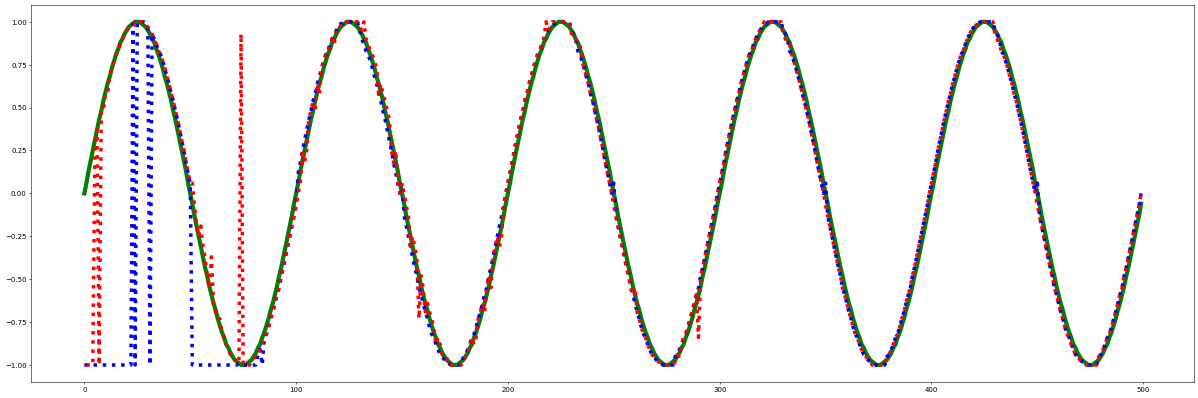

In [7]:
rows = 500
seq =[]
classifier=[]
predictions = []
for i in range(rows):
    angle = (i * math.pi) / 50.0
    sine_value = math.sin(angle)
    seq.append(round(sine_value,2))
    
    inputSDR = enc.encode(seq[i])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=True)
    tm.activateDendrites(True)
    
    clsr.learn(tm.getActiveCells(), int((seq[i] - minimum) / resolution))

    classifier.append(np.argmax( clsr.infer( tm.getPredictiveCells() ) ) * resolution + minimum)
    
    predictor.learn(i, tm.getActiveCells(), int((seq[i] - minimum) / resolution))

    pdf = predictor.infer( tm.getActiveCells() )
    #print(pdf[1])
    if pdf[1]:
        predictions.append( np.argmax( pdf[1] ) * resolution + minimum )
    else:
        predictions.append(float("nan"))
            
    clear_output(wait = True)
    plt.cla
    plot = plt.figure(figsize=(30,10),dpi=50)
    plt.plot(seq, color='green', linestyle = "solid", linewidth = 6.0)
    plt.plot(classifier, color='blue', linestyle = "dotted", linewidth = 5.0)
    plt.plot(predictions, color='red', linestyle = "dotted", linewidth = 5.0)
    plt.show()

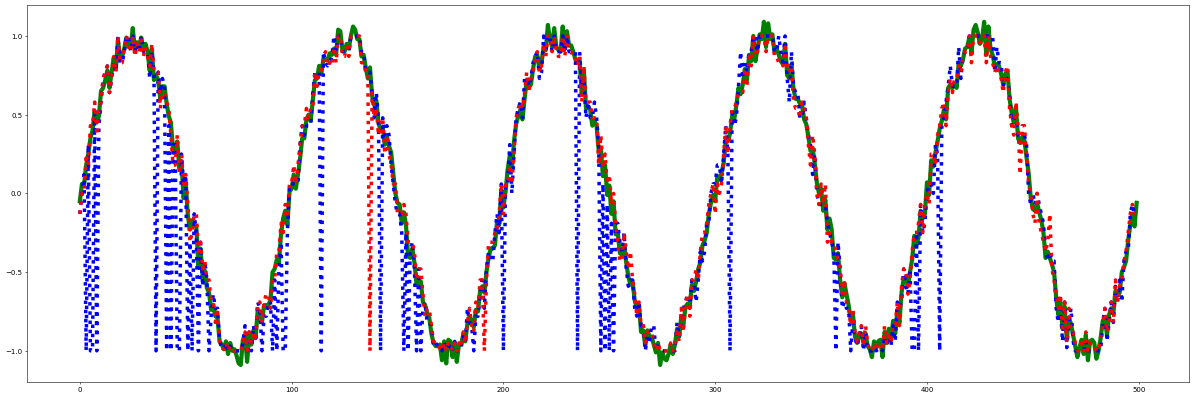

In [8]:
import random
rows = 500
seq =[]
classifier=[]
predictions = []
for i in range(rows):
    angle = (i * math.pi) / 50.0
    sine_value = math.sin(angle)
    noise_value = sine_value+random.uniform(-1, 1)*00.1
    seq.append(round(noise_value,2))
    
    inputSDR = enc.encode(seq[i])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=True)
    tm.activateDendrites(True)
    
    #clsr.learn(tm.getActiveCells(), int((seq[i] - minimum) / resolution))

    classifier.append(np.argmax( clsr.infer( tm.getPredictiveCells()) ) * resolution + minimum)
    
    #predictor.learn(i, tm.getActiveCells(), int((seq[i] - minimum) / resolution))

    pdf = predictor.infer( tm.getActiveCells() )

    if pdf[1]:
        predictions.append( np.argmax( pdf[1] ) * resolution + minimum )
    else:
        predictions.append(float("nan"))
            
    clear_output(wait = True)
    plt.cla
    plot = plt.figure(figsize=(30,10),dpi=50)
    plt.plot(seq, color='green', linestyle = "solid", linewidth = 6.0)
    plt.plot(classifier, color='blue', linestyle = "dotted", linewidth = 5.0)
    plt.plot(predictions, color='red', linestyle = "dotted", linewidth = 5.0)
    plt.show()

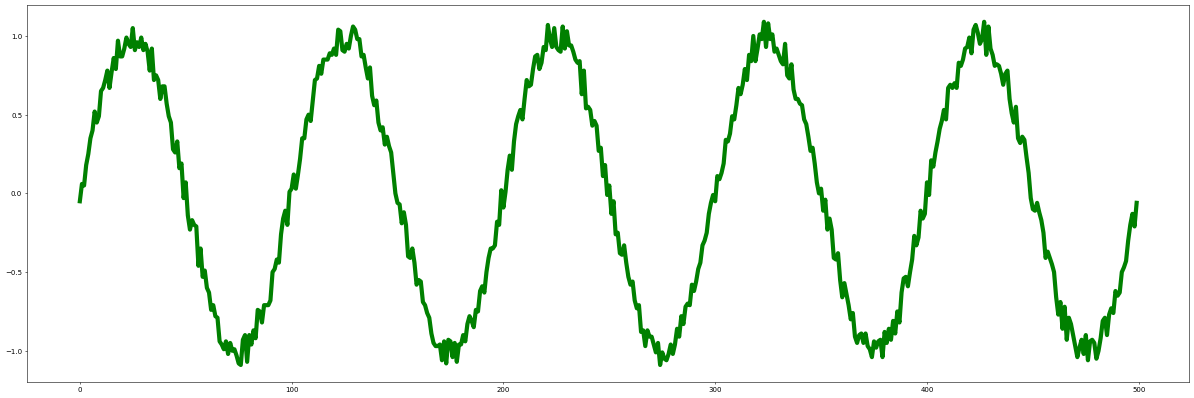

In [9]:
plot = plt.figure(figsize=(30,10),dpi=50)
plt.plot(seq, color='green', linestyle = "solid", linewidth = 6.0)
plt.show()

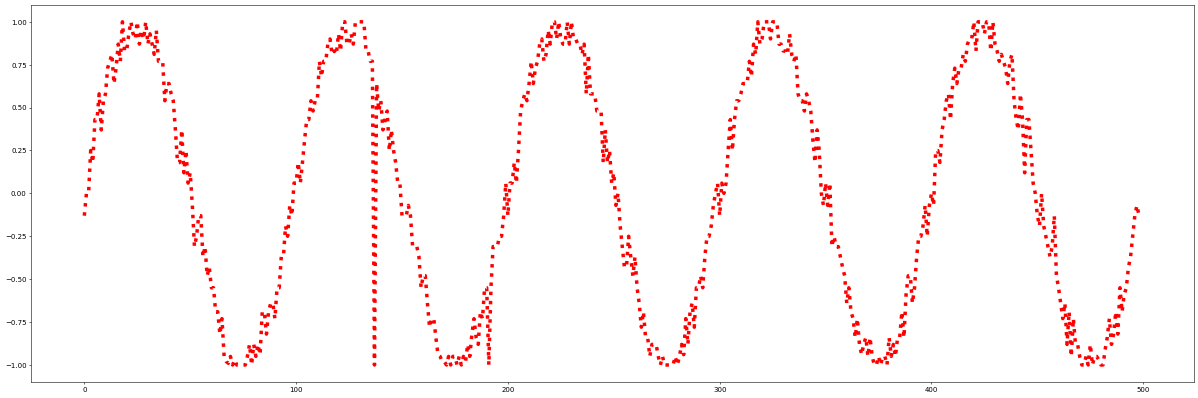

In [10]:
plot = plt.figure(figsize=(30,10),dpi=50)
plt.plot(predictions, color='red', linestyle = "dotted", linewidth = 5.0)
plt.show()